### Tutorial: Marginalized Likelihood optimization for model selection
In this tutorial we are exploring how to use in-build marginalized likelihood optimizer. 
The optimizer can optimize nearly any parameters via general function as well as includes couple of
quick common usecase references. 

In [1]:
import torch
from stpy.continuous_processes.gauss_procc import GaussianProcess
from stpy.kernels import KernelFunction
from stpy.helpers.helper import interval

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

/home/mojko/Downloads/Installation/pymanopt/pymanopt/solvers/solver.py:116: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if iter is not -1:
/home/mojko/Downloads/Installation/pymanopt/pymanopt/solvers/solver.py:118: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if costevals is not -1:


In [2]:
n = 40 
d = 2
x = torch.rand(n,d).double()*2 - 1
xtest = torch.from_numpy(interval(50,2,L_infinity_ball=1))

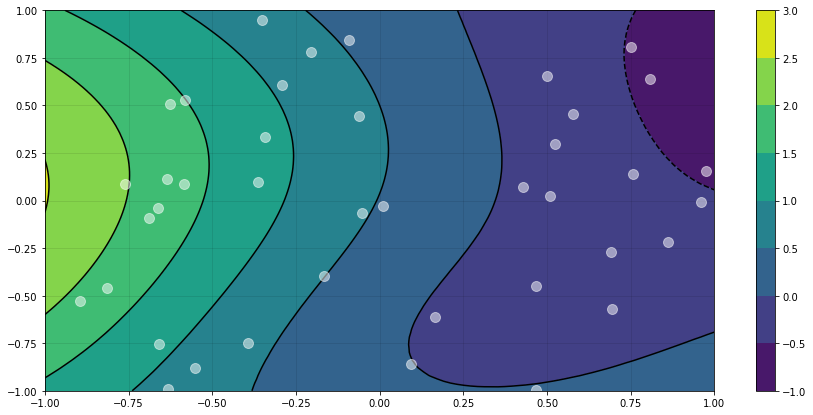

<AxesSubplot:>

In [3]:
GP = GaussianProcess(gamma=0.1, kernel_name="ard", d=2)
y = GP.sample(x)
GP.fit_gp(x,y)
GP.visualize_contour(xtest, ms = 10)

In [4]:
## Kernels can be defined as via kernel object
# 2 dimensional additive kernel with groups [0] and [1]
k = KernelFunction(kernel_name = "ard", d = 2, groups = [[0],[1]] )
GP = GaussianProcess(kernel=k)
y = GP.sample(x)
GP.fit_gp(x,y)
GP.optimize_params(type="bandwidth", restarts=2, verbose = False)

/home/mojko/Documents/PhD_Projects/stpy/stpy/continuous_processes/gauss_procc.py:300: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  alpha = torch.solve(self.y,K)[0]


Terminated - min grad norm reached after 15 iterations, 0.11 seconds.

Terminated - min stepsize reached after 16 iterations, 0.09 seconds.

Kernel description:

	kernel: ard
	operation: -
	kappa=1
	group=[0, 1]
	ard_gamma=tensor([0.9792, 0.9617], dtype=torch.float64)
	groups=[[0], [1]]
lambda=0.001


In [5]:
# ## Additive via algebra
k1 = KernelFunction(kernel_name="ard" ,ard_gamma = 0.1, d = 1, group=[0])
k2 = KernelFunction(kernel_name="polynomial" ,ard_gamma = 0.5, power = 2, d = 1, group=[1])
k = k1 + k2

GP = GaussianProcess(kernel=k, d=2)
x = torch.rand(n, d).double() * 2 - 1
y = GP.sample(x)
GP.fit_gp(x, y)
GP.optimize_params(type="bandwidth", restarts=2)

Terminated - min stepsize reached after 15 iterations, 0.09 seconds.

Terminated - min stepsize reached after 14 iterations, 0.06 seconds.

Kernel description:

	kernel: ard
	operation: -
	kappa=1
	group=[0]
	ard_gamma=tensor([-0.1068], dtype=torch.float64)

	kernel: polynomial
	operation: +
	kappa=1
	group=[1]
	degree=2
lambda=0.001


In [6]:
## Optimize additive groups
k = KernelFunction(kernel_name="ard", d=2, groups = [[0,1]])
GP = GaussianProcess(kernel=k, d=2)
#
x = torch.rand(n, d).double() * 2 - 1
y = GP.sample(x)
GP.fit_gp(x, y)
GP.optimize_params(type="groups", restarts=2)


Kernel description:

	kernel: ard
	operation: -
	kappa=1
	group=[0, 1]
	ard_gamma=tensor([1., 1.], dtype=torch.float64)
	groups=[[0, 1]]
lambda=0.001


In [7]:
k = KernelFunction(kernel_name="polynomial", d=2, power = 3)
GP = GaussianProcess(kernel=k, d=2)
x = torch.rand(n, d).double() * 2 - 1
y = GP.sample(x)
GP.fit_gp(x, y)
params = {"0":{"power":(1.,[1,2,3,4,5],None)}}
GP.optimize_params_general(params = params, optimizer="discrete")



Kernel description:

	kernel: polynomial
	operation: -
	kappa=1
	group=[0, 1]
	degree=3
	power=1
lambda=0.001


True

In [8]:
## Full covariance optimization on PSD manifold
k = KernelFunction(kernel_name="full_covariance_se", d=2)
GP = GaussianProcess(kernel=k, d=2)
x = torch.rand(n, d).double() * 2 - 1
y = GP.sample(x)
GP.fit_gp(x, y)
GP.optimize_params(type="covariance", restarts=2)

Terminated - min grad norm reached after 21 iterations, 0.16 seconds.

Terminated - min grad norm reached after 21 iterations, 0.10 seconds.

Kernel description:

	kernel: full_covariance_se
	operation: -
	kappa=1
	group=[0, 1]
	cov=tensor([[ 0.8754,  0.5039],
        [ 0.5761, -0.7777]], dtype=torch.float64)
lambda=0.001


In [9]:
# the same optimization problem can be run with regularizer as well 
GP.optimize_params(type="covariance", restarts=2, regularizer=["spectral_norm",0.1])



Terminated - min stepsize reached after 19 iterations, 0.10 seconds.

Terminated - min grad norm reached after 16 iterations, 0.07 seconds.

Kernel description:

	kernel: full_covariance_se
	operation: -
	kappa=1
	group=[0, 1]
	cov=tensor([[-0.4725,  0.8925],
        [-0.9016, -0.3513]], dtype=torch.float64)
lambda=0.001
